# *Homework 9*
## *Probability and simulation*
by Emil Pernler epernler@kth.se
#### 1. The St. Petersburg paradox
a) I would be willing to pay 2^7 = 128 SEK. <br>
b) The unrealistic assumptions are the infinite time and resources theoretically needed for this game from both the casino and the player, making it technically impossible to play this game. In reality, it's higly unlikely those scenarios would occur, and casinos usually impose constraints to some elements of the game. <br>
c) Simulation parameters: <br>
*   maximum payout in SEK: X = 10,000,000
*   maximum number of games: N = 1,000,000
*   average payoff over last games: n = 10

Parameter motivation: The results got more interesting at 1 million games, even 10 million, but took too long to generate. 10 million SEK is arbitrary since I never saw results more than 1400 SEK as a max value for a single simulation (but wanted to leave the chance open).

d) Over time, it converges to around 25 in my experimentation.




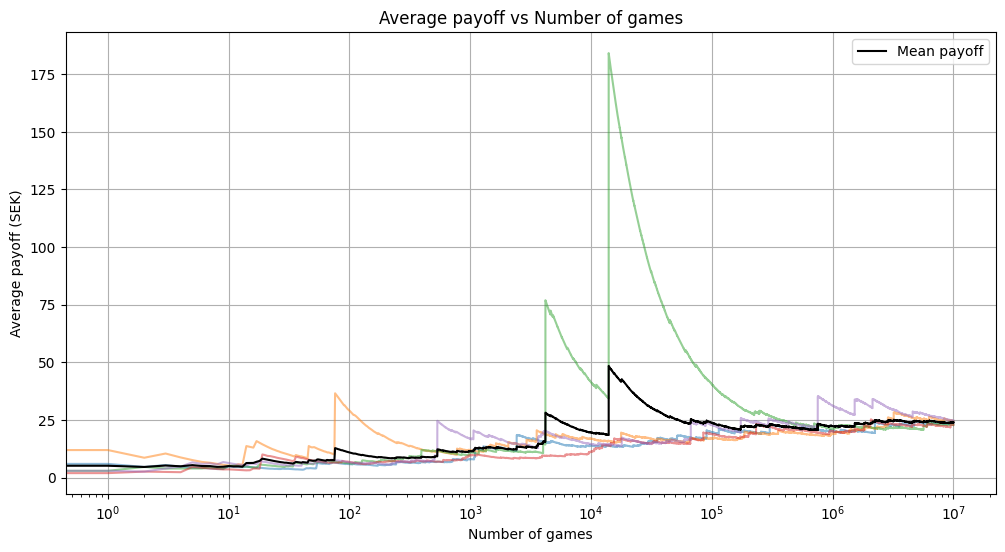

In [ ]:
import numpy as np
import matplotlib.pyplot as plot

X = 10000000
N = 1000000
num_sim = 5

def petersburg(N,X):
  result = np.zeros(N)

  for i in range(N):
    n = 1
    while np.random.rand() > 0.5:
      n += 1
    balance = 2 ** n
    if balance > X:
      balance = X
    result[i] = balance

  return np.cumsum(result) / np.arange(1, N + 1) # divide the cumulutative sum with the corresponding game number

simulations = []

for sim in range(num_sim):
    simulations.append(petersburg(N, X))

mean = np.mean(simulations, axis=0)

plot.figure(figsize=(12, 6))

for sim in simulations:
    plot.plot(sim, alpha=0.5)

plot.plot(mean, color='black', label='Mean payoff')
plot.title('Average payoff vs Number of games')
plot.xlabel('Number of games')
plot.ylabel('Average payoff (SEK)')
plot.legend()
plot.grid(True)
plot.xscale('log')
plot.show()


#### 2. Likelihood of emergency analysis

Below one can see that it is highly statistically unlikely that 369 or more visitors arrive on one given day. Therefore, it is reasonable to assume that there are other causes that are behind this event. If we calculate the z-score[1] we get z = (X - lambda) / (lambda)^(1/2) = (369-300)/17.32 = 3.984 which means that the observed value 369 visitors in one day is almost 4 standard deviations above the mean.



Days with 369 or more visitors: 20
Days simulated: 365000
P-value: 0.000055


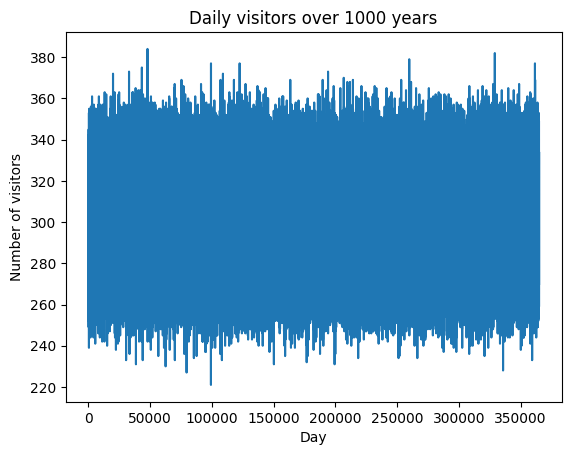

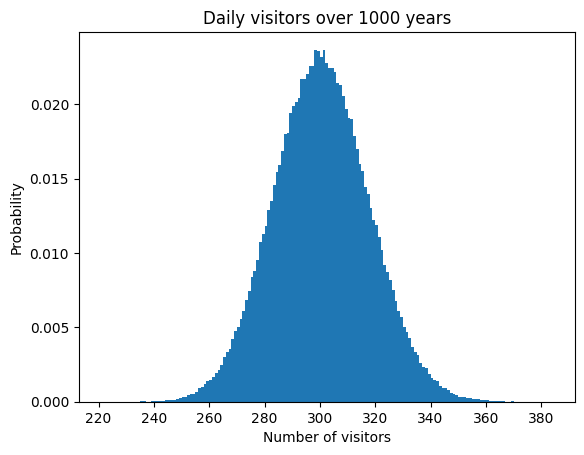

In [2]:
import numpy as np
import matplotlib.pyplot as plot
from scipy.stats import poisson, norm

visitors_day = 300
num_days = 365000  # 365 * 1000 years

np.random.seed(42)

count = []
for _ in range(num_days):
    time = 0
    arrivals = 0
    while time < 1:
        interarrival_time = np.random.exponential(scale=1/visitors_day)
        time += interarrival_time
        if time < 1:
            arrivals += 1
    count.append(arrivals)

# Convert to numpy array for analysis
count = np.array(count)


# 369 days or more + p value
p_value = np.sum(count >= 369) / num_days

print(f"Days with 369 or more visitors: {np.sum(count >= 369)}")
print(f"Days simulated: {num_days}")
print(f"P-value: {p_value:.6f}")
# Time series
plot.plot(count)
plot.title('Daily visitors over 1000 years')
plot.xlabel('Day')
plot.ylabel('Number of visitors')
plot.show()
# Histogram
plot.hist(count, bins=range(count.min(), count.max() + 1), density=True)
plot.title('Daily visitors over 1000 years')
plot.xlabel('Number of visitors')
plot.ylabel('Probability')
plot.show()


### References
1. H. Lang, Formelsamling och Tabeller i Statistik och Sannolikhetsteori SF1922, Royal Institute of Science and Technology, Stockholm, Sweden, Nov. 15, 2010. [Online]. Available: https://www.math.kth.se/matstat/gru/5b1508/formler.pdf